<a href="https://colab.research.google.com/github/Aniri7777/hello-world/blob/main/neural_network_shoe_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, RNN, LSTM, Bidirectional, Embedding, Conv2D, MaxPool2D


from google.colab import files
from IPython.display import Image

In [ ]:
rm -rf `find -L -type d -name .ipynb_checkpoints`

In [ ]:
sneakers_img = image.load_img("/content/training/sneakers shoes/red.jpg")
hills_img = image.load_img("/content/training/hills shoes/pink.jpg")

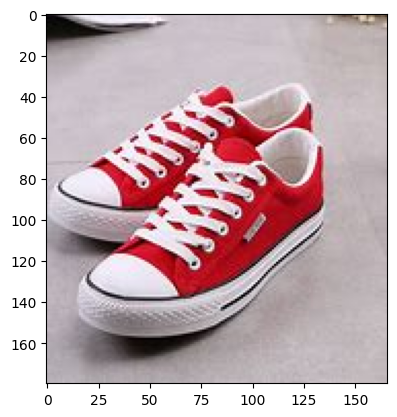

In [ ]:
plt.imshow(sneakers_img)

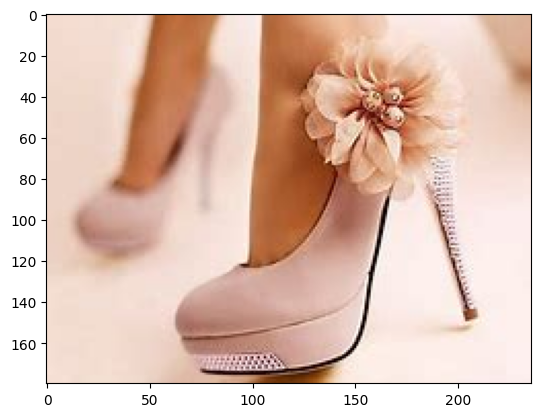

In [ ]:
plt.imshow(hills_img)

In [ ]:
cv2.imread("/content/training/sneakers shoes/red.jpg").shape

(180, 166, 3)

In [ ]:
cv2.imread("/content/training/hills shoes/pink.jpg").shape

(180, 236, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/training",
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = "binary")
validation_dataset = validation.flow_from_directory("/content/validation",
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = "binary")

Found 37 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'hills shoes': 0, 'sneakers shoes': 1}

In [ ]:
train_dataset.class_mode

'binary'

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation = "relu", input_shape = (200, 200, 3)),
    MaxPool2D(2, 2),
    Conv2D(32, (3, 3), activation = "relu", input_shape = (200, 200, 3)),
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation = "relu", input_shape = (200, 200, 3)),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(512, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [ ]:
tf.keras.utils.plot_model(model=)

SyntaxError: invalid syntax (<ipython-input-161-926d15fff4a1>, line 1)

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ["accuracy"])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 100,
                      validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 1s 118ms/step - loss: 11.9308 - accuracy: 0.4444 - val_loss: 1.0656 - val_accuracy: 0.4286
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 0.9550 - accuracy: 0.6667 - val_loss: 0.6733 - val_accuracy: 0.5714
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 0.6953 - accuracy: 0.4444 - val_loss: 0.7339 - val_accuracy: 0.4286
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 0.5952 - accuracy: 0.7778 - val_loss: 0.7134 - val_accuracy: 0.4286
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6740 - accuracy: 0.5556 - val_loss: 0.7352 - val_accuracy: 0.4286
Epoch 6/100
3/3 [==============================] - 0s 51ms/step - loss: 0.5204 - accuracy: 0.7778 - val_loss: 0.7287 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.8287 - accuracy: 0.6667 - val_loss: 1.8978 - val_accuracy: 0.4286
Epoch 8/100
3/3 [=

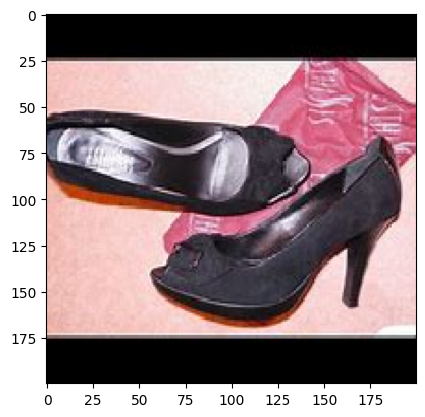

1/1 [==============================] - 0s 74ms/step
This is sneaker shoe


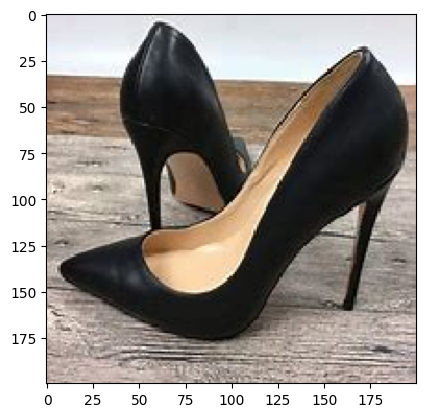

1/1 [==============================] - 0s 18ms/step
This is hills shoes


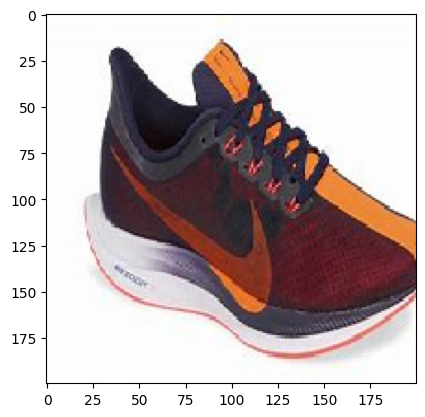

1/1 [==============================] - 0s 19ms/step
This is hills shoes


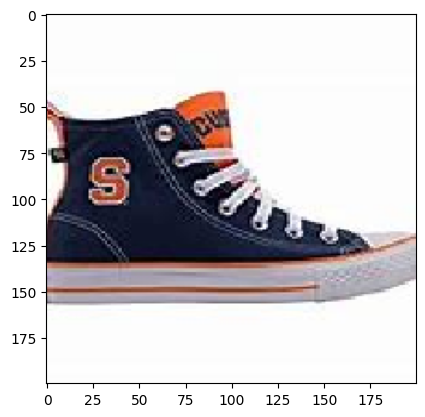

1/1 [==============================] - 0s 20ms/step
This is sneaker shoe


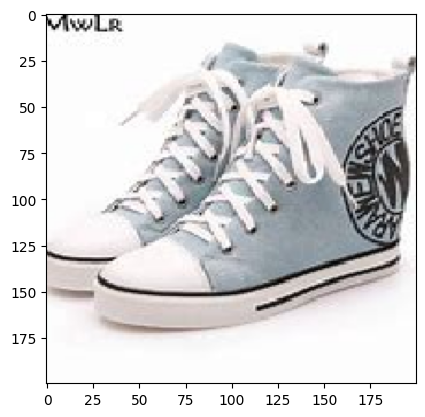

1/1 [==============================] - 0s 20ms/step
This is sneaker shoe


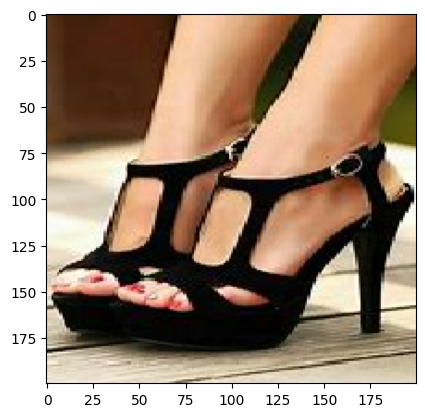

1/1 [==============================] - 0s 30ms/step
This is hills shoes


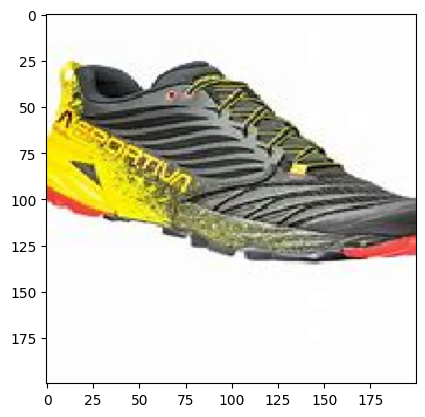

1/1 [==============================] - 0s 28ms/step
This is hills shoes


In [ ]:
dir_path = "/content/testing/different shoes"

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"///"+ i, target_size = (200, 200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 1:
    print("This is sneaker shoe")
  else:
    print("This is hills shoes")